# CS598 DL4H Project Draft - Predicting all 33-cancer types and their normal tissues with CNN

- Class: CS598 Deep Learning for Healthcare, Spring 2024

- **Project Team #106:**

  *   Zhanchao Yang: zy45@illinois.edu
  *   Bin Li: binl3@illinois.edu
  *   Yutang Lin: yutangl2@illinois.edu

  - Project colab links
    * https://https://colab.research.google.com/drive/1lBfRjo8mngEMPz4dmYmNpAfbD0SBRKkn?usp=sharing
  - Github
    * Github link
    (https://github.com/zhanchaoy417/CS598DLH-Project-Team106)




# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

Instruction: https://colab.research.google.com/notebooks/io.ipynb

Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction
*   Background of the problem
  * The type of problem of this paper is around the classification of 33 cancer tumors and the accurate prediction of cancer types for cancer diagnosis and treatment.
  * It is important to accurately predict cancer types. By distinguishing the differences in various cancer types, we can quickly analyze the cause of the disease and provide treatment for patients, and provide the biological correlation of cancer marker genes.
  * The difficulty is considering that the influence of the tissue of origin can lead to bias in the identification of cancer markers. In addition, large databases and complex calculations are also challenges.
  * By implementing Deep learning technology models through convolutional neural networks (CNN), the model takes unstructured gene expression input and have better performance on gene embedding and the Cancer Genome Atlas (TCGA) training and testing.

*   Paper explanation
  * Based on different designs of gene embedding and convolution schemes,, The paper propose three CNN models: 1D-CNN, 2D-Vanilla-CNN and 2D-Hybrid-CNN.
  * The innovations of the method are to combine tumor and non-tumor sample classification and use advanced CNN technology to distinguish cancer types.
  * The CNN model achieved an accuracy of 93.9% to 95.0% in 34 categories and identified a total of 2,090 cancer markers, achieving an accuracy of 88.42% in predicting 5 subtypes of breast cancer.
  * The contribution to the reasearch regime are promote future cancer diagnostics and the biology of cancer marker genes by accurately identifying cancer types based on gene expression profiles and eliminating the influence of tissue of origin.


In [ ]:
# code comment is used as inline annotations for your coding

# Scope of Reproducibility

List hypotheses from the paper you will test and the corresponding experiments you will run.


1.   Hypothesis 1: Dataset import
  * We had been setting up file paths for preprocessed data files in the Google Colab and Github directories. It then opens the first and second preprocessed data files from the paper author, and reads its contents using pd.read_pickle.
2.   Hypothesis 2: Build Model
  * The 2D-CNN model had been built. The models were trained and tested on a combined 10,340 samples of 33 cancer types and 713 matched normal tissues of The Cancer Genome Atlas (TCGA).
3.   Hypothesis 3: Model Training
  * The model was trained using k-fold cross-validation (k=10), and within each fold the data was split into training and test sets.
4.   Hypothesis 4: Model Evaluation
  * During the elution process, we used the Adam optimizer and the categorical cross-entropy loss function.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


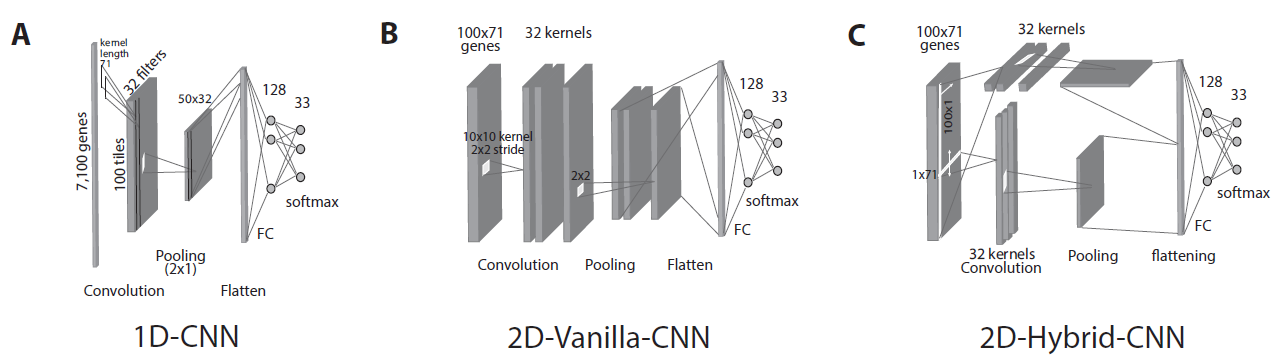

In [ ]:
# mount this notebook to your google drive
drive.mount('/content/gdrive')

# define dirs to workspace and data
img_dir = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/git_models_fig.png'

import cv2
img = cv2.imread(img_dir)
#cv2.imshow("Title", img)

#DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash;
#see https://github.com/jupyter/notebook/issues/3935.
from google.colab.patches import cv2_imshow
cv2_imshow(img)


# Methodology

 This methodology consists of run-able codes with necessary annotations to show the expeiment executed for testing the hypotheses.

 The methodology contains four subsections **data**,  **model**, **Training** and **Evaluation**  in our experiment.

In [ ]:
# import  packages you need
import numpy as np
from google.colab import drive


In [ ]:
#https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_33class/5cv_1D_CNN_33class.py
#https://github.com/MMostavi/CNNCancerType/blob/master/5cv_33class/5cv_1D_CNN_33class.py

'''
This code is written by Milad Mostavi, one of authors of
"Convolutional neural network models for cancer type prediction based on gene expression" paper.
Please cite this paper in the case it was useful in your research
'''
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import StratifiedKFold


## Data

## Data descriptions
- The paper mentioned that the pan-cancer RNA-Seq data were downloaded from The Cancer Genome Atlas (TCGA) by an R/Bioconductor package TCGAbiolinks in  ecember 2018.
- The dataset contained 10340 and 731 samples for 33 cancer types and 23 normal tissues, respectively.
- We have uploaded the raw dataset to Google Drive and shared with all @ illinois users
- The datasets links:

    TCGA_new_pre_first.pckl https://drive.google.com/file/d/1HB7onUJkq0FbSTkrY6-HM2b1DSeU2_ox/view?usp=sharing
    TCGA_new_pre_second.pckl https://drive.google.com/file/d/1EGrv4KJiq6oZcXku8eOwQfJkmkZdiifk/view?usp=sharing


## Implementation code
- The Implementation code snippet sets up file paths for preprocessed data files in the directory. It then opens the first and second preprocessed data files from the paper author, reads its contents using pd.read_pickle, and assigns the extracted data to variables. Finally, the sample dataset is also presented below.

In [ ]:
raw_data_dir = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/'

TCGA_new_pre_second = raw_data_dir + 'TCGA_new_pre_second.pckl'
TCGA_new_pre_first = raw_data_dir + 'TCGA_new_pre_first.pckl'

A = open(TCGA_new_pre_second, 'rb')
[dropped_genes_final, dropped_gene_name, dropped_Ens_id, samp_id_new, diag_name_new,
 project_ids_new] = pd.read_pickle(A)
A.close()

f = open(TCGA_new_pre_first, 'rb')
[_, _, _, _, remain_cancer_ids_ind, remain_normal_ids_ind] = pd.read_pickle(f)
f.close()



In [ ]:
dropped_genes_final.head()

,TCGA-OR-A5L4-01A-11R-A29S-07,TCGA-OR-A5KX-01A-11R-A29S-07,TCGA-OR-A5JT-01A-11R-A29S-07,TCGA-OR-A5K9-01A-11R-A29S-07,TCGA-OR-A5JV-01A-11R-A29S-07,TCGA-OR-A5KV-01A-11R-A29S-07,TCGA-OR-A5JE-01A-11R-A29S-07,TCGA-OR-A5JC-01A-11R-A29S-07,TCGA-OR-A5LJ-01A-11R-A29S-07,TCGA-OR-A5JW-01A-11R-A29S-07,...,TCGA-AB-2817-03A-01T-0736-13,TCGA-AB-2820-03A-01T-0735-13,TCGA-AB-2836-03A-01T-0736-13,TCGA-AB-2875-03A-01T-0735-13,TCGA-AB-2813-03A-01T-0736-13,TCGA-AB-2828-03A-01T-0734-13,TCGA-AB-2867-03A-01T-0734-13,TCGA-AB-2869-03A-01T-0735-13,TCGA-AB-2874-03A-01T-0735-13,TCGA-AB-2971-03A-01T-0734-13
0,3.593240,3.399946,3.469919,2.821973,2.113599,3.340179,2.882158,3.261231,3.454196,2.908243,...,0.075757,0.417011,0.069219,0.019337,0.143819,0.058231,0.153018,0.190013,0.011547,0.012874
5,0.714444,0.654546,0.873279,0.648664,3.069690,0.455662,1.455837,1.372938,0.762597,0.686878,...,6.033750,3.563423,7.351657,3.986349,7.614381,6.702327,5.354292,3.982174,4.579541,6.171896
6,3.119220,0.136111,0.815520,0.515149,1.088918,0.593629,1.196094,1.424073,0.537714,1.292043,...,2.764164,0.092021,1.377900,0.634325,1.523553,0.306817,0.208830,2.007915,0.152967,0.649813
8,2.464426,2.003238,2.537203,2.874994,2.917765,1.830781,2.021776,1.650647,2.110871,3.203194,...,3.031122,2.336721,2.924426,2.949463,2.541956,2.864531,2.846580,3.209733,2.515867,2.721580
11,1.291976,2.233912,1.894536,1.227373,1.872202,1.670156,1.631871,1.818367,1.680304,1.909422,...,3.070595,3.478873,2.705409,3.213689,2.459187,2.273078,2.684096,3.653754,3.128056,3.262724


##  Model

## Model descriptions
The model includes the model definitation which usually is a class, model training, and other necessary parts. (need to deleted)
  * Model architecture: The model architecture is implemented using Sequential API and has input layer, pooling layer, flattening layer: connection layer, output layer and activation function. The input layer is Conv2D, has 32 filters, and the kernel size is (1, 71). The pooling layer is (MaxPooling2D) and the pool size is (1, 2). The flattened layer has 17280 units for input, the dense layer has 128 units, and the activation function uses ReLU and softmax functions.
  * Training objectives: The model is using the Adam optimizer and the categorical cross-entropy loss function. In each loss term, the mean and standard deviation scores are calculated.
  * Others: the model is pretrained, including integer encoder and binary encoder add nine zeros to the end of our samples.
  * The model validation using k-fold (k=10), and for each loop, generate a train and test.

## Implementation code
The Implementation code snippet sets up the model as conv2d, and setup kernel size, input size, add MaxPooling2D, size is (1, 2), and sets the activation equation to softmax and relu.


In [ ]:
project_ids_new

array(['TCGA-ACC', 'TCGA-ACC', 'TCGA-ACC', ..., 'TCGA-LAML', 'TCGA-LAML',
       'TCGA-LAML'], dtype=object)

In [ ]:
## embedding labels
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(project_ids_new)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

X_cancer_samples =dropped_genes_final.iloc[:,remain_cancer_ids_ind].T.values
X_normal_samples = dropped_genes_final.iloc[:,remain_normal_ids_ind].T.values
onehot_encoded_cancer_samples = onehot_encoded[remain_cancer_ids_ind]
onehot_encoded_normal_samples = onehot_encoded[remain_normal_ids_ind]

X_cancer_samples_mat = np.concatenate((X_cancer_samples,np.zeros((len(X_cancer_samples),9))),axis=1)
## add nine zeros to the end of each sample
X_cancer_samples_mat = np.reshape(X_cancer_samples_mat, (-1, 71, 100))

## This line is useful when only one fold training is needed
x_train, x_test, y_train, y_test = train_test_split(X_cancer_samples_mat, onehot_encoded_cancer_samples,
                                                    stratify= onehot_encoded_cancer_samples,
                                                    test_size=0.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
img_rows, img_cols = len(x_test[0]), len(x_test[0][0])
num_classes = len(y_train[0])
batch_size = 128
epochs = 20
seed = 7
np.random.seed(seed)


input_Xs = X_cancer_samples_mat
y_s = project_ids_new[remain_cancer_ids_ind]

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

##  Training

## Computational requirements
Model training is done outside of this notebook, the screenshot below shows that 2218529 parameters were tested to evaluate the performance of the model. The model was trained using k-fold cross-validation (k=10), and within each fold the data was split into training and test sets. At the same time, input data preprocessing, such as encoder and add zeros for our sample for better training.

## Implementation code
The Implementation code snippet uses k-fold for loop and the range is 10, and uses kfold.split() output tranin and test for each loop..


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


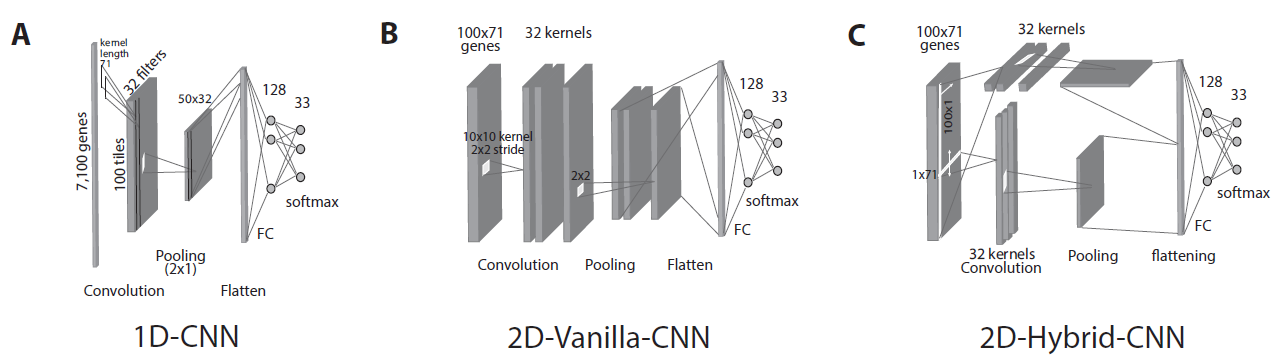

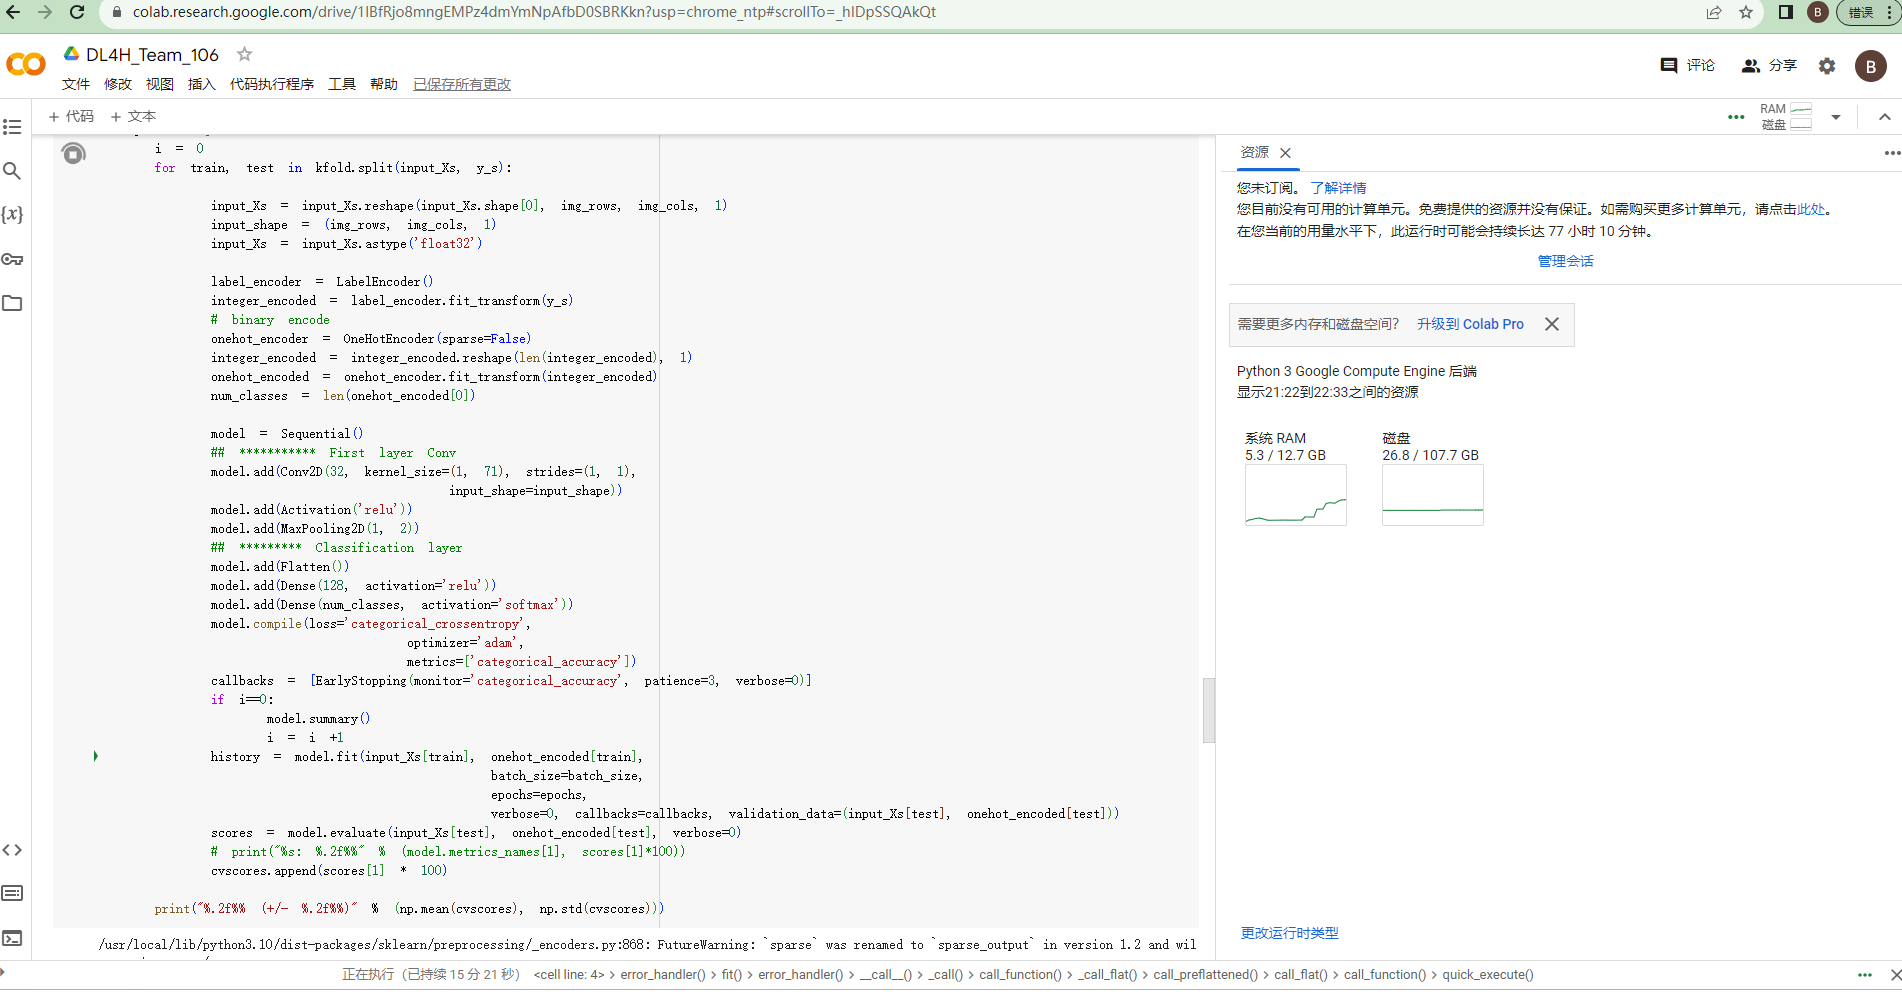

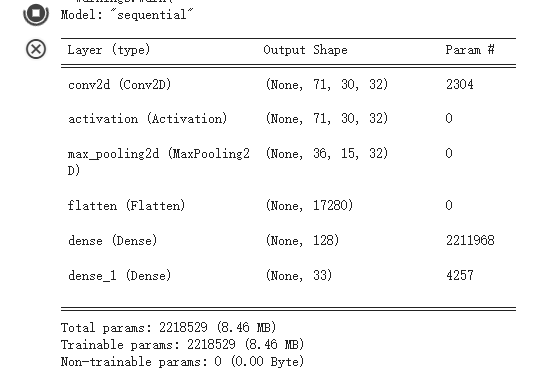

In [ ]:
# mount this notebook to your google drive
drive.mount('/content/gdrive')

# define dirs to workspace and data
img_dir = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/git_models_fig.png'
img_dir_running_minutes = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/model_running_15minutes.png'
img_dir_layers = '/content/gdrive/My Drive/Colab Notebooks/DL4H_project_team_106/model_layers.png'

import cv2
img = cv2.imread(img_dir)
img_running_minutes = cv2.imread(img_dir_running_minutes)
img_layers = cv2.imread(img_dir_layers)
#cv2.imshow("Title", img)

#DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash;
#see https://github.com/jupyter/notebook/issues/3935.
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(img_running_minutes)
cv2_imshow(img_layers)

##  Evaluation

## Metrics descriptions
During the elution process, we used the Adam optimizer and the categorical cross-entropy loss function. The Adam optimizer can quickly and efficiently converge to obtain results in large and complex data sets, while the Categorical Cross-Entropy loss function is used to measure the difference between the predicted cancer category probability and the true label. These can be done through a certain number of training and continuous verification of data, and stopping early if necessary to prevent overfitting. Then for each fold, the mean and standard deviation of these scores are calculated to evaluate the performance of the model.

## Implementation code
 The Implementation code snippet uses np for each loop. mean and np. std calculates mean and standard deviation scores and retains 2 decimal places.

In [ ]:
#https://github.com/chenlabgccri/CancerTypePrediction/blob/master/5cv_33class/5cv_1D_CNN_33class.py
#https://github.com/MMostavi/CNNCancerType/blob/master/5cv_33class/5cv_1D_CNN_33class.py

for j in range(10):
    i = 0
    for train, test in kfold.split(input_Xs, y_s):

        input_Xs = input_Xs.reshape(input_Xs.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        input_Xs = input_Xs.astype('float32')

        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(y_s)
        # binary encode
        onehot_encoder = OneHotEncoder(sparse=False)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        num_classes = len(onehot_encoded[0])

        model = Sequential()
        ## *********** First layer Conv
        model.add(Conv2D(32, kernel_size=(1, 71), strides=(1, 1),
                         input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(1, 2))
        ## ********* Classification layer
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['categorical_accuracy'])
        callbacks = [EarlyStopping(monitor='categorical_accuracy', patience=3, verbose=0)]
        if i==0:
            model.summary()
            i = i +1
        history = model.fit(input_Xs[train], onehot_encoded[train],
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0, callbacks=callbacks, validation_data=(input_Xs[test], onehot_encoded[test]))
        scores = model.evaluate(input_Xs[test], onehot_encoded[test], verbose=0)
        # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 71, 30, 32)        2304      
                                                                 
 activation (Activation)     (None, 71, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17280)             0         
                                                                 
 dense (Dense)               (None, 128)               2211968   
                                                                 
 dense_1 (Dense)             (None, 33)                4257      
                                                        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
class my_model():
  # use this class to define your model
  pass

model = my_model()
loss_func = None
optimizer = None

def train_model_one_iter(model, loss_func, optimizer):
  pass

num_epoch = 10
# model training loop: it is better to print the training/validation losses during the training
for i in range(num_epoch):
  train_model_one_iter(model, loss_func, optimizer)
  train_loss, valid_loss = None, None
  print("Train Loss: %.2f, Validation Loss: %.2f" % (train_loss, valid_loss))


# Results


 This methodology consists of run-able codes with necessary annotations to show the expeiment executed for testing the hypotheses.

 The results section contains three subsections **Results**,  **Analyses** and **Plans**  in our experiment.


## Results
- In this paper reproduction, we will introduce Convolutional Neural Network (CNN) models that take unstructured gene expression inputs to classify tumor and non-tumor samples into their designated cancer types or as normal.
- Based on different designs of gene embeddings and convolution schemes, we will implement three CNN models: 1D-CNN, 2D-Vanilla-CNN, and 2D-Hybrid-CNN. The models were trained and tested on combined 10,340 samples of 33 cancer types and 713 matched normal tissues of The Cancer Genome Atlas (TCGA).
- These models achieved excellent prediction accuracies (93.9-95.0%) among 34 classes (33 cancers and normal). Furthermore, we interpreted the 1D-CNN model with a guided saliency technique and identified a total of 2,090 cancer markers (108 per class). The concordance of differential expression of these markers between the cancer type they represent and others is confirmed.

The below picture is the loss value over the training data after each epoch for 34 cancer type prediction performances of three CNN models trained with combined tumor and normal samples.

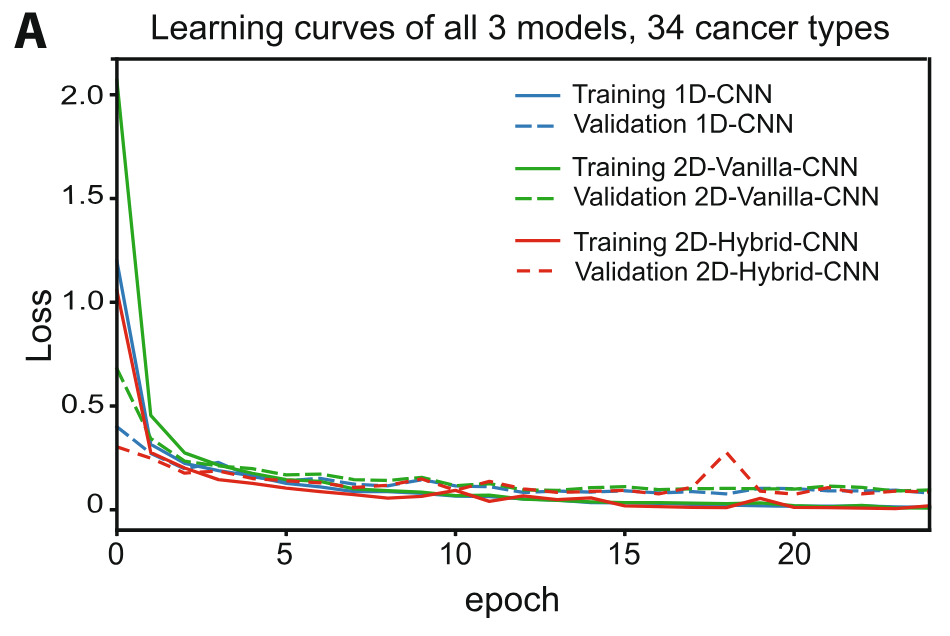

In [ ]:
# metrics to evaluate my model

# plot figures to better show the results

# it is better to save the numbers and figures for your presentation.

## Analyses

1D-CNN and 2D-Hybrid-CNN achieved comparable accuracy (95.7%), which improves the result (95.6%) slightly in the previous lecture. Note that 2D-Vanilla-CNN contains only one layer and 32 kernels, whereas the 2D-3LayerCNN consists of multiple DL modules, a much more complex architecture compare to 1D-CNN.
  * The 1D-CNN is significantly simpler than the other models proposed in the literature

  * The 2D-Vanilla-CNN has around one million hyperparameters which are  significantly more than those of the 1D-CNN

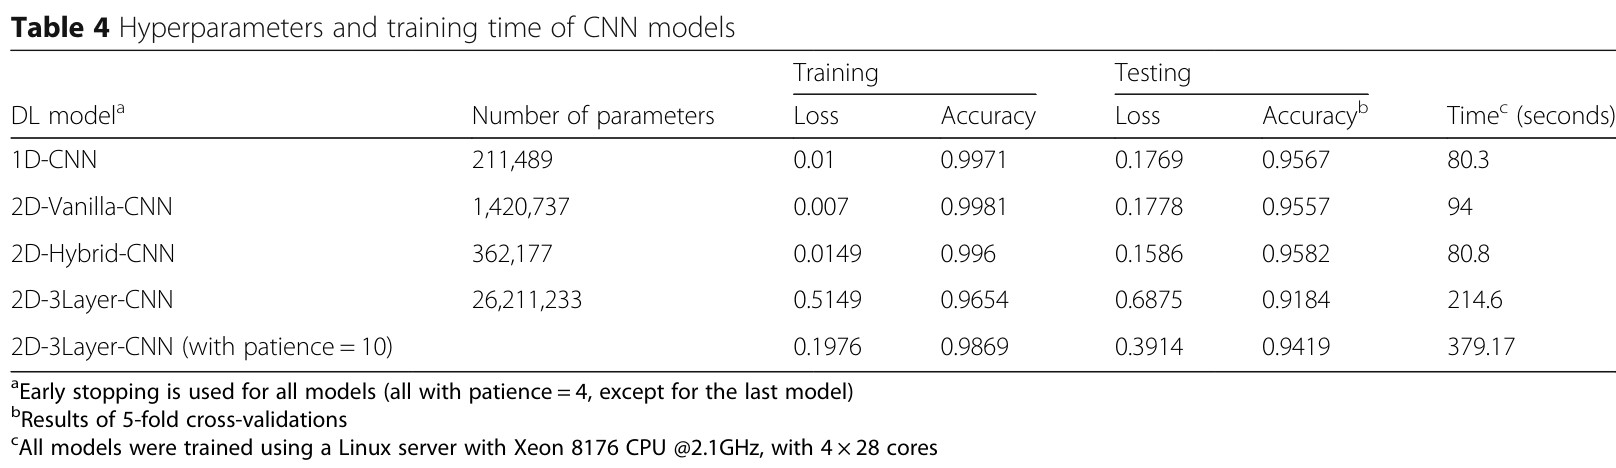

In [ ]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

## Plan

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * The paper is reproducible. Reproducible areas include adding other types of CNN models for testing such as conv1D, or increasing/decreasing k-fold to test.
  * But if we don't have access to the exact data set, it can be a hindrance in terms of reproduction.
  * The easy part is to run the code provided in the colab notebook to train the CNN model to get the gene expression data. The difficult part is the lack of specific information about the dataset used, and the lack of more efficient computer configurations to run the data on.
  * The suggestions are that reproducers provide detailed documentation about the dataset used, including its data source, steps for downloading, preprocessing steps, and any data transformation equations, and to add some explanation to the code.
  * The next step is to use alternative data with similar characteristics to communicate with other groups and validate the findings.



# References

1.  Mostavi, M., Chiu, YC., Huang, Y. et al. Convolutional neural network models for cancer type prediction based on gene expression. BMC Med Genomics 13 (Suppl 5), 44 (2020). https://doi.org/10.1186/s12920-020-0677-2

